<a href="https://colab.research.google.com/github/unaexoo/Study/blob/main/Tensir_Flost_and_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset -f

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Raw MINIST Data : ")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
Raw MINIST Data : 
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print("\nFlatten MNIST Data : ")
print(X_train.shape)
print(X_test.shape)


Flatten MNIST Data : 
(60000, 784)
(10000, 784)


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print("\nNormalized MNIST Data : ")
print(X_train[0,:])
print(X_test[0,:])


Normalized MNIST Data : 
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64. 

In [5]:
import tensorflow as tf

# y레이블 원핫 코드 변환
print(y_train[0])
print(y_test[0])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print("\nOne-Hot Encoding MNIST Data : ")
print(y_train[0,:])
print(y_test[0,:])

5
7

One-Hot Encoding MNIST Data : 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


신경망 설계

In [6]:
n_input = X_train.shape[1]
n_hidden = [128]

n_output = 10

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 신경망 모델 생성
mlp_model = Sequential()
mlp_model.add(Dense(units = n_hidden[0], # 128
                    activation = 'tanh', # 활성화함수
                    input_shape = (n_input,),
                    kernel_initializer='random_uniform', # 초기 가중치 값
                    bias_initializer='zeros'))

mlp_model.add(Dense(units = n_output,
                    activation = 'tanh',
                    kernel_initializer = 'random_uniform',
                    bias_initializer='zeros'))

mlp_model.compile(loss = 'mean_squared_error', #평균제곱오차 (categorical_crossentropy, mean_absolute_error)
                  optimizer = Adam(learning_rate = 4e-3), # Adam : learning rate를 조정해줌
                  metrics = ['accuracy'])

mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습

In [8]:
# 신경망 및 히스토리 설계
hist = mlp_model.fit(X_train, y_train,
                     validation_data = (X_test, y_test),
                     epochs = 30,
                     batch_size = 32,
                     verbose = 1)

res = mlp_model.evaluate(X_test, y_test, verbose = 0)
print("[Err, Acc] = ",res)

Epoch 1/30
1875/1875 [==============================] - 14s 5ms/step - loss: 0.0644 - accuracy: 0.5702 - val_loss: 0.0567 - val_accuracy: 0.6523
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0559 - accuracy: 0.6469 - val_loss: 0.0490 - val_accuracy: 0.7011
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0500 - accuracy: 0.6765 - val_loss: 0.0456 - val_accuracy: 0.7065
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0472 - accuracy: 0.7199 - val_loss: 0.0441 - val_accuracy: 0.7355
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.7308 - val_loss: 0.0417 - val_accuracy: 0.7681
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0460 - accuracy: 0.7328 - val_loss: 0.0401 - val_accuracy: 0.7677
Epoch 7/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0457 - accuracy: 0.7119 - val_loss: 0.0424 - val_accuracy

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 1024)              803840    
                                                                 
 dense_44 (Dense)            (None, 512)               524800    
                                                                 
 dense_45 (Dense)            (None, 512)               262656    
                                                                 
 dense_46 (Dense)            (None, 512)               262656    
                                                                 
 dense_47 (Dense)            (None, 256)               131328    
                                                                 
 dense_48 (Dense)            (None, 256)               65792     
                                                                 
 dense_49 (Dense)            (None, 128)              

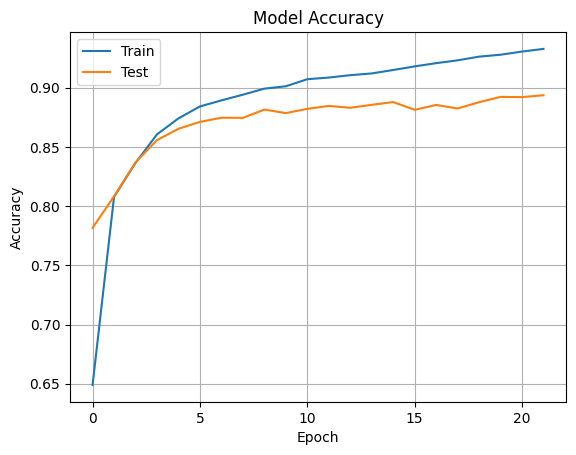

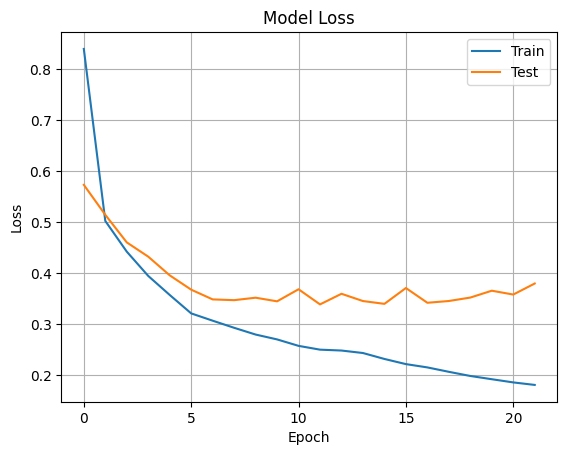

In [14]:
%reset -f


import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


import matplotlib.pyplot as plt


# fashion MNIST 데이터 가져와서 가공하기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # 아래의 모든 코드는 복사 붙여넣기 하고 신경망 설정만 수정


X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


# 신경망 설계
n_input = X_train.shape[1]    # 784 (= 28 x 28)개
n_hidden = [1024, 512, 512, 512, 256, 256, 128,128]              # 은닉층의 뉴런 수
n_output = 10


mlp_model = Sequential()      # 신경망 모델 생성


mlp_model.add(Dense(input_shape=(n_input,),
                    units=n_hidden[0], activation='relu',
                    kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp_model.add(Dense(units=n_hidden[1], activation='relu',
                    kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp_model.add(Dense(units=n_hidden[2], activation='relu',
                    kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp_model.add(Dense(units=n_hidden[3], activation='relu',
                    kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp_model.add(Dense(units=n_hidden[4], activation='relu',
                    kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp_model.add(Dense(units=n_hidden[5], activation='relu',
                    kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp_model.add(Dense(units=n_hidden[6], activation='relu',
                    kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp_model.add(Dense(units=n_hidden[7], activation='relu',
                    kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp_model.add(Dense(units=n_output, activation='sigmoid',  # crossentropy를 쓸 거면 최종 함수는 sigmoid 사용을 추천
                    kernel_initializer='random_uniform', bias_initializer='zeros'))


mlp_model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
mlp_model.summary()


# 신경망 학습 및 히스토리 보존
hist = mlp_model.fit(X_train, y_train,
                     validation_data=(X_test, y_test),
                     epochs=30,
                     batch_size=128,
                     callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         patience=10,
                                                         restore_best_weights=True)
                     ],
                     verbose=1)  #verb = 1


res = mlp_model.evaluate(X_test, y_test, verbose=0)
print("[Err, Acc] = : ", res)


# Accuracy Traning Curve
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()


# Loss Curve
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel( 'Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()


## 트레이닝 커브를 보고 앞에 비해 어떠한 상황이 되는지 생각해보자
